In [335]:
pip install dash


Note: you may need to restart the kernel to use updated packages.


In [336]:
def print_df(df):
    print(df.to_string(index=False))

In [337]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.jleague.co/standings/j1/2024/'
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table')

    
    headers = [header.text.strip().replace(' ', '') for header in table.find_all('th')]

    
    rows = []
    club_links = []
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        cols_text = [col.text.strip() for col in cols]
        cols_text[-1] = '-'.join(cols_text[-1].split()) 
        club_link = row.find('a')['href']
        cols_text.insert(1, f"https://www.jleague.co{club_link}")
        club_links.append(f"https://www.jleague.co{club_link}")
        rows.append(cols_text)

    
    headers.insert(1, 'Link')

    
    df = pd.DataFrame(rows, columns=headers)

df.rename(columns={'CLUB': 'Club', 'POS' : 'Position', 'FORM' : 'Form', 'PTS' : 'Points'}, inplace=True)
df['Club'] = df['Club'].replace('Yokohama F･Marinos', 'Yokohama F.Marinos')
print_df(df)


Position                                                     Link                       Club  P  W D  L GF GA  GD Points      Form
       1          https://www.jleague.co/clubs/FC-Machida-Zelvia/          FC Machida Zelvia 16 11 2  3 27 12  15     35 W-D-W-W-W
       2            https://www.jleague.co/clubs/Kashima-Antlers/            Kashima Antlers 16 10 2  4 27 17  10     32 W-D-W-W-W
       3                https://www.jleague.co/clubs/Vissel-Kobe/                Vissel Kobe 16  9 2  5 24 12  12     29 W-W-W-L-L
       4                https://www.jleague.co/clubs/Gamba-Osaka/                Gamba Osaka 16  8 4  4 15 11   4     28 W-W-D-W-W
       5             https://www.jleague.co/clubs/Nagoya-Grampus/             Nagoya Grampus 16  8 2  6 19 17   2     26 W-L-W-W-D
       6                 https://www.jleague.co/clubs/Urawa-Reds/                 Urawa Reds 16  7 3  6 26 22   4     24 W-W-W-D-L
       7               https://www.jleague.co/clubs/Cerezo-Osaka/               Cer

In [338]:
df.dtypes

Position    object
Link        object
Club        object
P           object
W           object
D           object
L           object
GF          object
GA          object
GD          object
Points      object
Form        object
dtype: object

In [339]:
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)
df['GD'] = df['GD'].astype(int)
df['Points'] = df['Points'].astype(int)
df['P'] = df['P'].astype(int)
df['W'] = df['W'].astype(int)
df['D'] = df['D'].astype(int)
df['L'] = df['L'].astype(int)

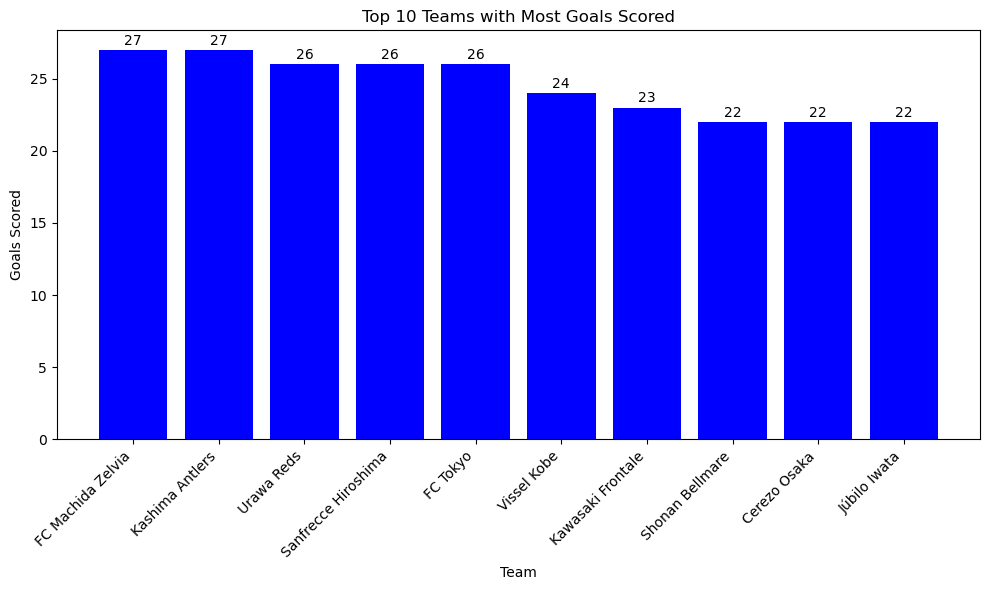

In [340]:
top_scorers = df.sort_values(by='GF', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['Club'], top_scorers['GF'], color='blue')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.title('Top 10 Teams with Most Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for index, value in enumerate(top_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center', va='bottom')
plt.show()


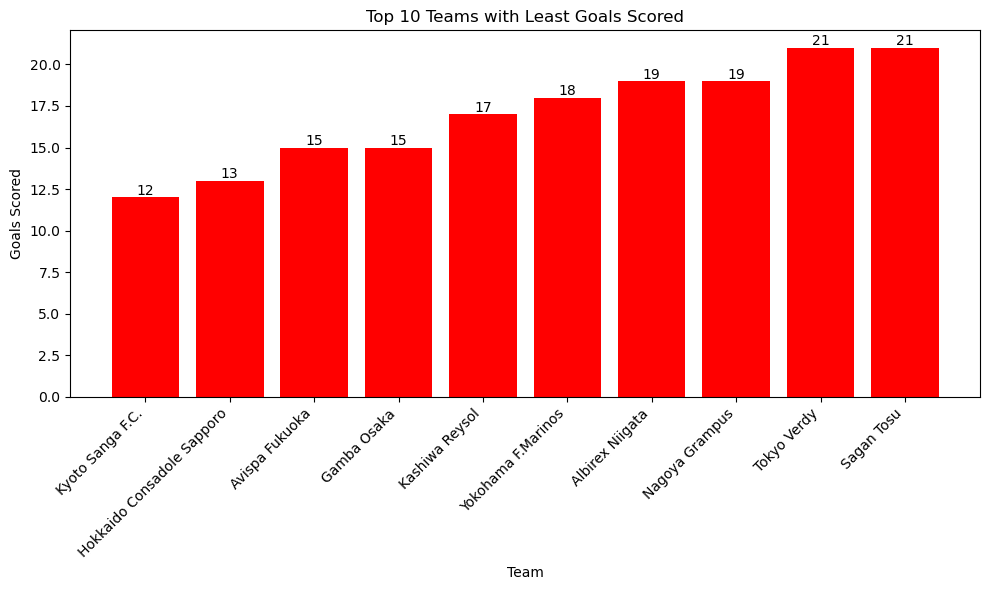

In [341]:
less_scorers = df.sort_values(by='GF', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(less_scorers['Club'], less_scorers['GF'], color = 'red')
for index, value in enumerate(less_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Scored')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [342]:
grouped = df.groupby('GF')['Club'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Scored', 'Count', 'Teams']

grouped = grouped.sort_values(by='Scored', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Scored  Count                                       Teams
     27      2          FC Machida Zelvia, Kashima Antlers
     26      3   Urawa Reds, Sanfrecce Hiroshima, FC Tokyo
     24      1                                 Vissel Kobe
     23      1                           Kawasaki Frontale
     22      3 Cerezo Osaka, Júbilo Iwata, Shonan Bellmare
     21      2                     Tokyo Verdy, Sagan Tosu
     19      2             Nagoya Grampus, Albirex Niigata
     18      1                          Yokohama F.Marinos
     17      1                              Kashiwa Reysol
     15      2                 Gamba Osaka, Avispa Fukuoka
     13      1                  Hokkaido Consadole Sapporo
     12      1                            Kyoto Sanga F.C.


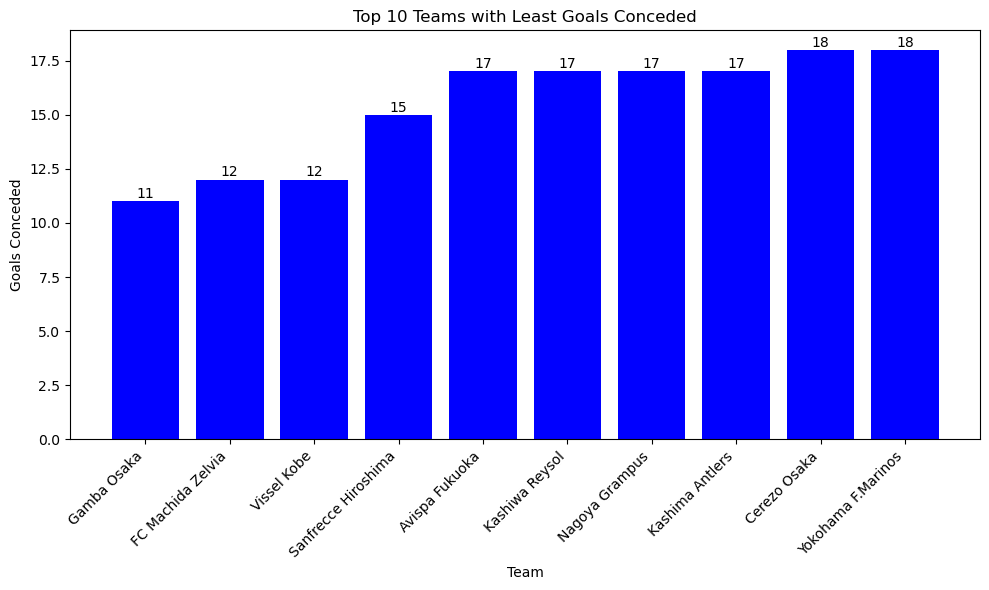

In [343]:
best_defense = df.sort_values(by='GA', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(best_defense['Club'], best_defense['GA'], color = 'blue')
for index, value in enumerate(best_defense['GA']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

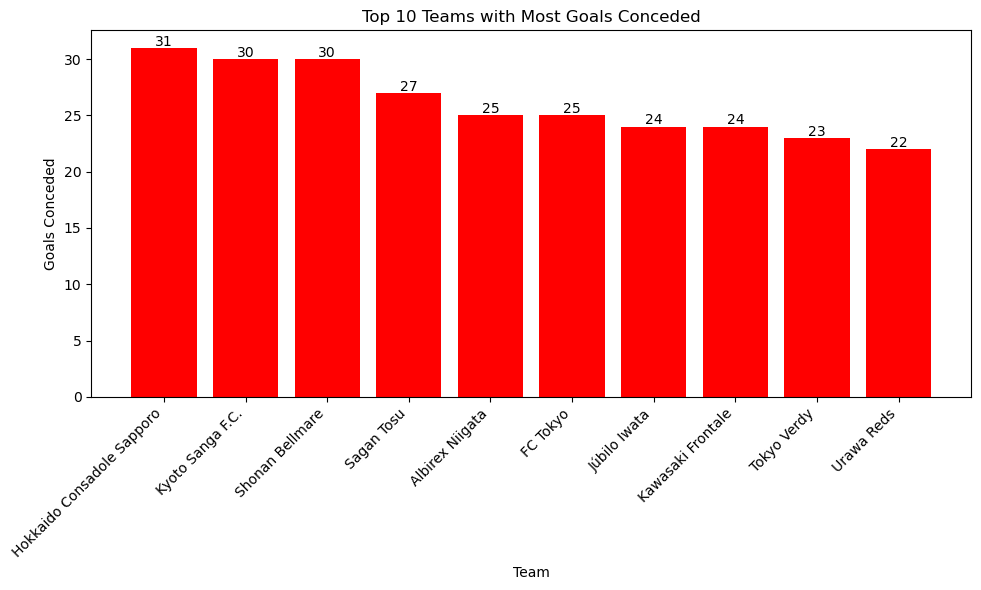

In [344]:
worst_defense = df.sort_values(by='GA', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(worst_defense['Club'], worst_defense['GA'], color = 'red')
for index, value in enumerate(worst_defense['GA']):
    plt.text(index, value + 0.2, str(value), ha='center')
plt.title('Top 10 Teams with Most Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [345]:
grouped = df.groupby('GA')['Club'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Conceded', 'Count', 'Teams']

grouped = grouped.sort_values(by='Conceded', ascending=True).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Conceded  Count                                                           Teams
       11      1                                                     Gamba Osaka
       12      2                                  FC Machida Zelvia, Vissel Kobe
       15      1                                             Sanfrecce Hiroshima
       17      4 Kashima Antlers, Nagoya Grampus, Kashiwa Reysol, Avispa Fukuoka
       18      2                                Cerezo Osaka, Yokohama F.Marinos
       22      1                                                      Urawa Reds
       23      1                                                     Tokyo Verdy
       24      2                                 Júbilo Iwata, Kawasaki Frontale
       25      2                                       FC Tokyo, Albirex Niigata
       27      1                                                      Sagan Tosu
       30      2                               Shonan Bellmare, Kyoto Sanga F.C.
       31      1            

In [346]:
def calculate_points(form):
    points = 0
    for result in form.split('-'):
        if result == 'W':
            points += 3
        elif result == 'D':
            points += 1
    return points

df['Points over the last 5 games'] = df['Form'].apply(calculate_points)

l5p = df[['Position','Club', 'Points over the last 5 games']].sort_values(by='Points over the last 5 games', ascending=False).reset_index(drop=True)

print_df(l5p)


Position                       Club  Points over the last 5 games
       1          FC Machida Zelvia                            13
       4                Gamba Osaka                            13
       2            Kashima Antlers                            13
       5             Nagoya Grampus                            10
       6                 Urawa Reds                            10
       3                Vissel Kobe                             9
      10             Kashiwa Reysol                             8
      12                Tokyo Verdy                             8
      18            Shonan Bellmare                             7
      11             Avispa Fukuoka                             7
      17                 Sagan Tosu                             6
       9                   FC Tokyo                             5
       8        Sanfrecce Hiroshima                             5
      15          Kawasaki Frontale                             5
      13  

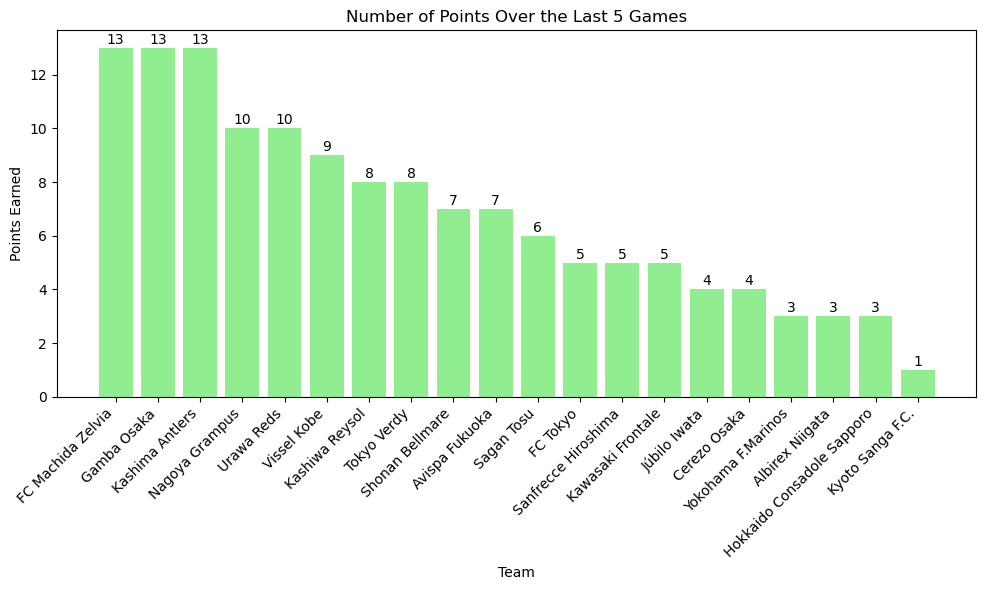

In [347]:
plt.figure(figsize=(10, 6))
plt.bar(l5p['Club'], l5p['Points over the last 5 games'], color = 'lightgreen')
for index, value in enumerate(l5p['Points over the last 5 games']):
    plt.text(index,value + 0.15, str(value), ha='center')
plt.title('Number of Points Over the Last 5 Games')
plt.xlabel('Team')
plt.ylabel('Points Earned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

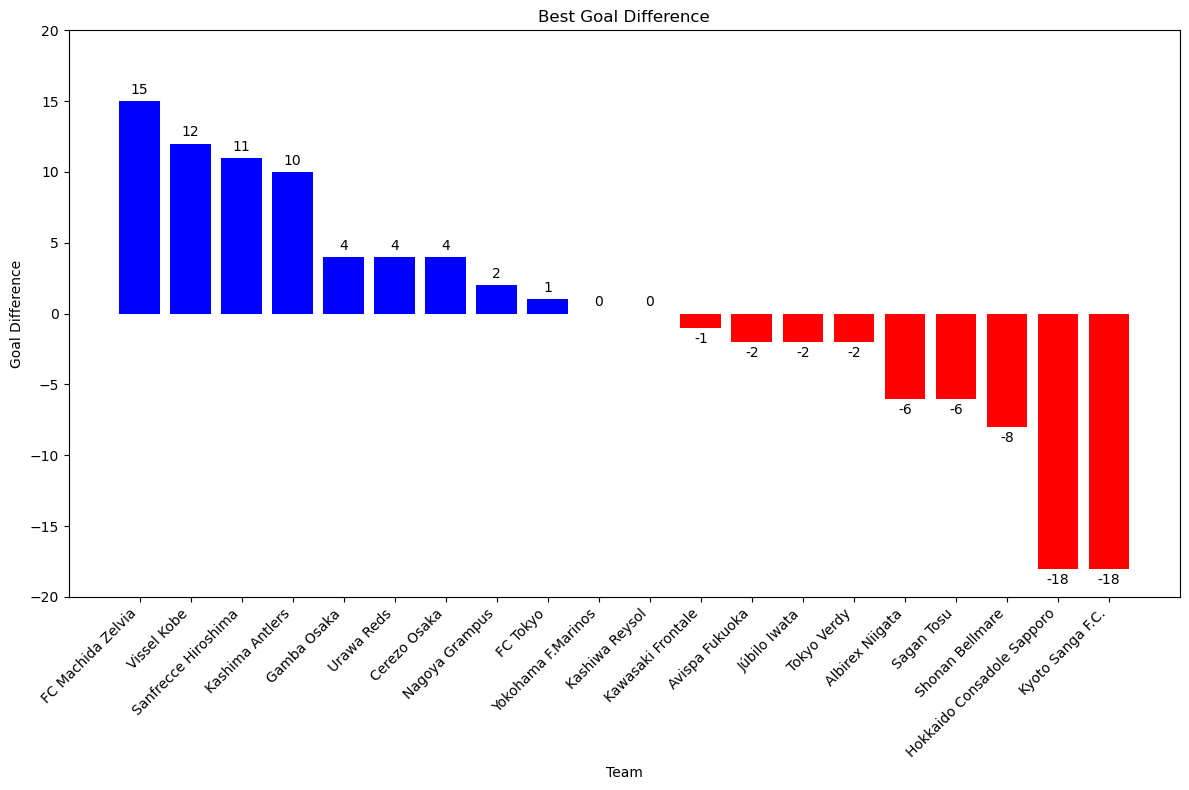

In [348]:
df2 = df.sort_values(by='GD', ascending=False)
colors = ['blue' if val >= 0 else 'red' for val in df2['GD']]
plt.figure(figsize=(12,8))
bars = plt.bar(df2['Club'], df2['GD'], color=colors)
for bar, value in zip(bars, df2['GD']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3 if value >= 0 else bar.get_height() - 0.3,
             str(value), ha='center', va='bottom' if value >= 0 else 'top')
plt.title('Best Goal Difference')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.ylim(-20, 20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [349]:
grouped = df.groupby('Points')['Club'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Points', 'Count', 'Teams']
grouped = grouped.sort_values(by='Points', ascending=False).reset_index(drop=True)
print_df(grouped)

 Points  Count                                 Teams
     35      1                     FC Machida Zelvia
     32      1                       Kashima Antlers
     29      1                           Vissel Kobe
     28      1                           Gamba Osaka
     26      1                        Nagoya Grampus
     24      2              Urawa Reds, Cerezo Osaka
     23      2         Sanfrecce Hiroshima, FC Tokyo
     22      2        Kashiwa Reysol, Avispa Fukuoka
     21      1                           Tokyo Verdy
     18      1                          Júbilo Iwata
     17      2 Yokohama F.Marinos, Kawasaki Frontale
     16      1                       Albirex Niigata
     14      2           Sagan Tosu, Shonan Bellmare
     11      1            Hokkaido Consadole Sapporo
     10      1                      Kyoto Sanga F.C.


In [350]:
df['PointsPerGame'] = df['Points'] / df['P']

df_sorted = df.sort_values(by='PointsPerGame', ascending=False)

df_sorted = df_sorted[['Position','Club', 'PointsPerGame']]

print_df(df_sorted)

Position                       Club  PointsPerGame
       1          FC Machida Zelvia       2.187500
       2            Kashima Antlers       2.000000
       3                Vissel Kobe       1.812500
       4                Gamba Osaka       1.750000
       5             Nagoya Grampus       1.625000
       8        Sanfrecce Hiroshima       1.533333
       6                 Urawa Reds       1.500000
       7               Cerezo Osaka       1.500000
      10             Kashiwa Reysol       1.466667
       9                   FC Tokyo       1.437500
      11             Avispa Fukuoka       1.375000
      12                Tokyo Verdy       1.312500
      14         Yokohama F.Marinos       1.307692
      13               Júbilo Iwata       1.125000
      15          Kawasaki Frontale       1.062500
      16            Albirex Niigata       1.000000
      17                 Sagan Tosu       0.933333
      18            Shonan Bellmare       0.875000
      19 Hokkaido Consadole Sap